In [1]:
%matplotlib inline


# Camera Transform

We can see the camera frame and the world frame. There is a grid of points from
which we know the world coordinates. If we know the location and orientation of
the camera in the world, we can easily compute the location of the points on
the image.


Automatically created module for IPython interactive environment


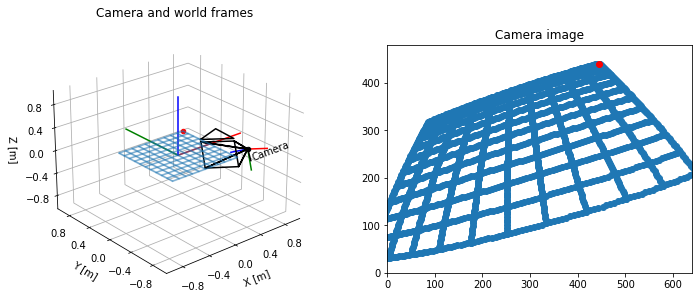

In [2]:
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from pytransform3d.plot_utils import make_3d_axis
from pytransform3d.rotations import active_matrix_from_intrinsic_euler_xyz
from pytransform3d.transformations import transform_from, plot_transform
from pytransform3d.camera import make_world_grid, world2image, plot_camera


cam2world = transform_from(
    active_matrix_from_intrinsic_euler_xyz([-np.pi + 1, -0.1, 0.3]),
    [0.2, -1, 0.5])
focal_length = 0.0036
sensor_size = (0.00367, 0.00274)
image_size = (640, 480)
intrinsic_camera_matrix = np.array([
    [focal_length, 0, sensor_size[0] / 2],
    [0, focal_length, sensor_size[1] / 2],
    [0, 0, 1]
])

world_grid = make_world_grid(n_points_per_line=101)
image_grid = world2image(world_grid, cam2world, sensor_size, image_size,
                         focal_length, kappa=0.4)

plt.figure(figsize=(12, 5))
ax = make_3d_axis(1, 121, unit="m")
ax.view_init(elev=30, azim=-70)
plot_transform(ax)
plot_transform(ax, A2B=cam2world, s=0.3, name="Camera")
plot_camera(ax, intrinsic_camera_matrix, cam2world,
            sensor_size=sensor_size, virtual_image_distance=0.5)
ax.set_title("Camera and world frames")
ax.scatter(
    world_grid[:, 0], world_grid[:, 1], world_grid[:, 2], s=1, alpha=0.2)
ax.scatter(world_grid[-1, 0], world_grid[-1, 1], world_grid[-1, 2], color="r")
ax.view_init(elev=25, azim=-130)

ax = plt.subplot(122, aspect="equal")
ax.set_title("Camera image")
ax.set_xlim(0, image_size[0])
ax.set_ylim(0, image_size[1])
ax.scatter(image_grid[:, 0], -(image_grid[:, 1] - image_size[1]))
ax.scatter(image_grid[-1, 0], -(image_grid[-1, 1] - image_size[1]), color="r")

plt.show()